In [245]:
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline
print plt.style.available
#plt.style.use('ggplot')
# plt.style.use('bmh')
# plt.style.use('classic')
plt.style.use('seaborn-notebook')


[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


# Data

In [140]:
camera = data.camera()
print type(camera)
print camera.shape

<type 'numpy.ndarray'>
(512, 512)


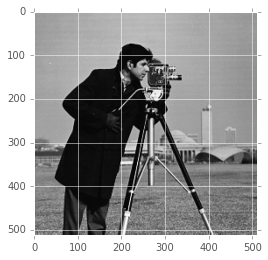

In [52]:
plt.imshow(camera,cmap='gray')

In [18]:
np.mean(camera), np.min(camera), np.max(camera)

(118.31400299072266, 0, 255)

(array([ 51199.,   8554.,   6922.,   8834.,  31923.,  43625.,  84777.,
         23862.,   1470.,    978.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

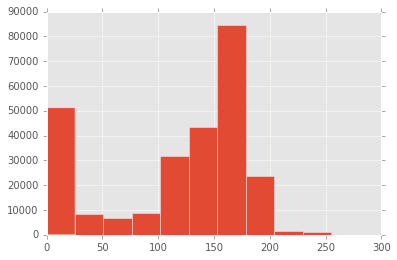

In [54]:
plt.hist(camera.ravel())

# color planes

(512, 512, 3)


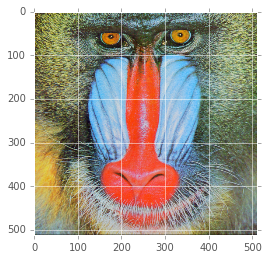

In [60]:
img = plt.imread('baboon.png')
print img.shape
plt.imshow(img)

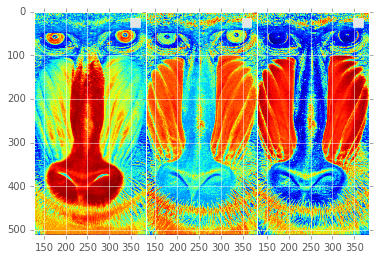

In [99]:
f, axes = plt.subplots(1,3,sharey='row')
f.subplots_adjust(wspace=0)
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
axes[0].imshow(img[:,:,0])
axes[0].legend('R')
axes[1].imshow(img[:,:,1])
axes[1].legend('G')
axes[2].imshow(img[:,:,2])
axes[2].legend('B')

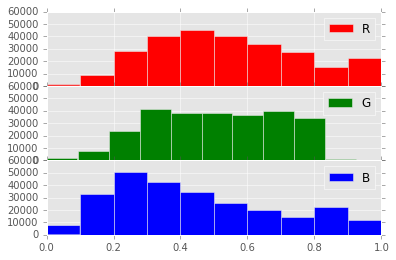

In [76]:
f, axes = plt.subplots(3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
axes[0].hist(img[:,:,0].ravel(), color='red')
axes[0].legend('R')
axes[1].hist(img[:,:,1].ravel(), color='green')
axes[1].legend('G')
axes[2].hist(img[:,:,2].ravel(), color='blue')
axes[2].legend('B')

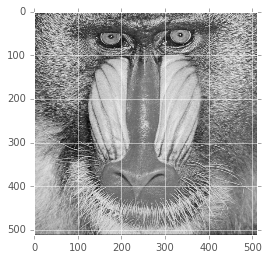

In [62]:
from skimage.color import rgb2gray 
img_grayscale = rgb2gray(img)
plt.imshow(img_grayscale, cmap='gray')

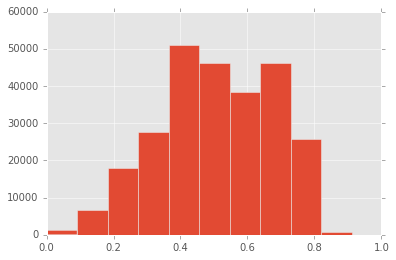

In [63]:
toto=plt.hist(img_grayscale.ravel())

# Image arithmetic

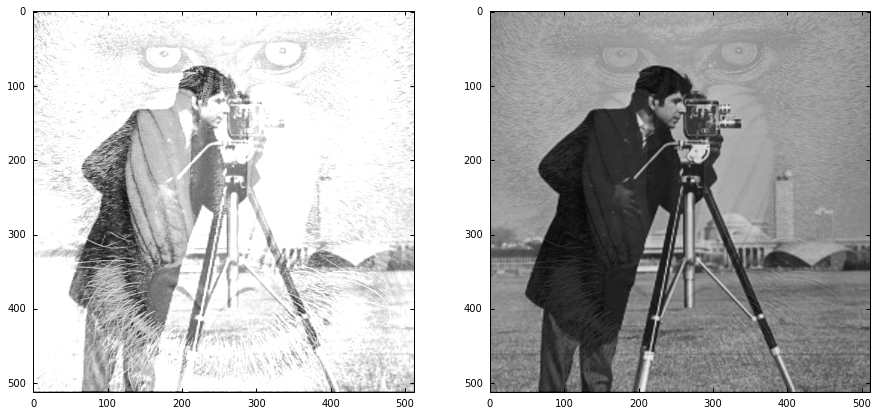

In [269]:
sum_ = camera+img_grayscale*255
avg = (0.8*camera+0.2*img_grayscale*255.)
f,axes = plt.subplots(1,2,figsize=(15,15))
# vmin and vmax to avoid automatic rescaling of values
axes[0].imshow(sum_,vmin=0,vmax=255,cmap='gray')#, norm=None, cmap='viridis')
axes[1].imshow(avg,vmin=0,vmax=255,cmap='gray')#,norm=None, cmap='Reds',interpolation='None')

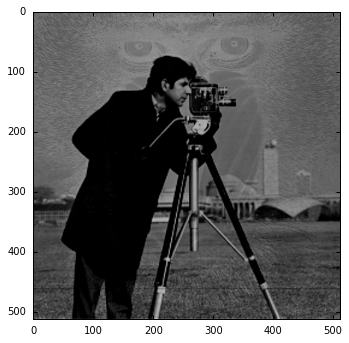

In [275]:
plt.imshow(0.8*camera-0.2*img_grayscale*255,vmin=0,vmax=255,cmap='gray')

In [297]:
np.size(camera)

262144

4.92440692811 -4.43285000869


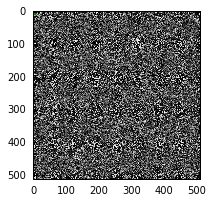

In [304]:
mean = [0,0]
cov = [[1,0],[0,1]]
plt.figure(figsize=(3,3))
noise2d = np.random.multivariate_normal(mean,cov, (512,512))
plt.plot(noise2d[0],noise2d[1], '.')
noise = np.random.normal(0,1,512*512)
noise_img = noise.reshape(512,512)
print noise_img.max(), noise_img.min()
plt.imshow(noise_img*255, cmap='gray',vmin=0,vmax=255)

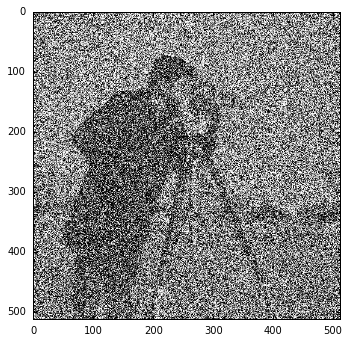

In [301]:
plt.imshow(noise_img*255+camera, cmap='gray',vmin=0,vmax=255)

# Masks

In [29]:
camera[256:264]=0
for row in camera:
    row[256:264] = 0

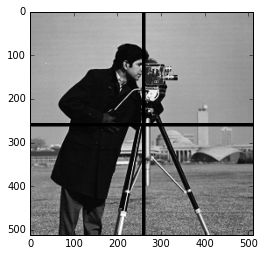

In [30]:
plt.imshow(camera,cmap='gray')

In [38]:
mask = camera<87
camera[mask] = 255

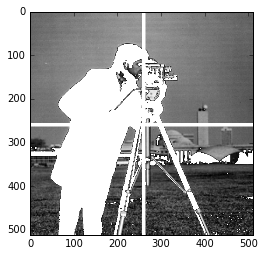

In [40]:
plt.imshow(camera, cmap='gray')

# Geometrical transformations

512 512


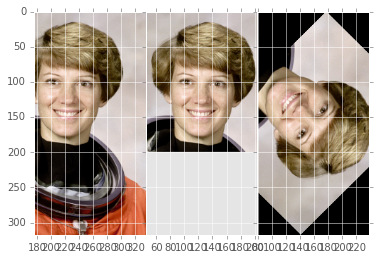

In [212]:
from scipy import ndimage
astronaut = data.astronaut()
f, axes = plt.subplots(1,3,sharey=True)
f.subplots_adjust(wspace=0)
axes[0].imshow(astronaut)
lrow, lcol, lcolor = astronaut.shape
print lrow, lcol
# x is row and y is column (!= usual axes)
crop = astronaut[0:200,100:350]
axes[1].imshow(crop)
flip_ud = np.flipud(crop)
rotate = ndimage.rotate(flip_ud, 45)
axes[2].imshow(rotate)

# Filters

In [205]:
from skimage import filters, io

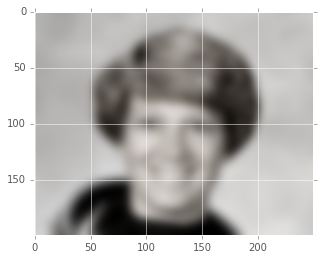

In [210]:
# blurring/smoothing
blurred = filters.gaussian(crop, sigma=4,multichannel=False)
plt.imshow(blurred)

In [213]:
# sharpen


# Edge detection

In [155]:
from skimage.feature import canny
from skimage import morphology

In [143]:
camera = data.camera()
edges = canny(camera)

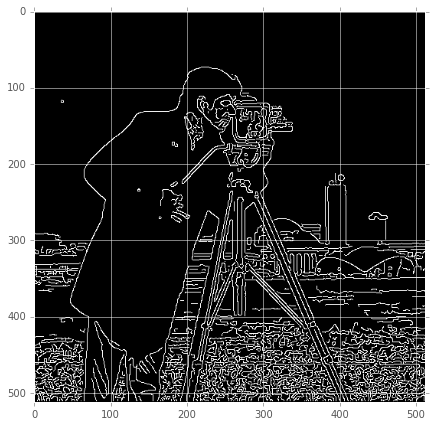

In [169]:
fig = plt.figure(figsize=(7,7))
plt.imshow(edges, cmap='gray')

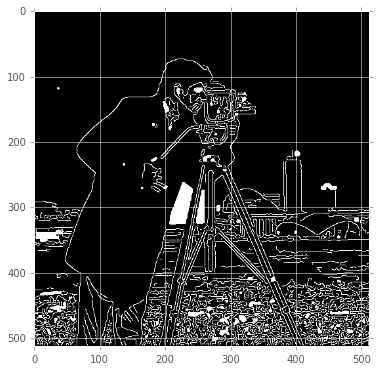

In [170]:
from scipy import ndimage as ndi
fig = plt.figure(figsize=(6,6))
fill_img = ndi.binary_fill_holes(edges)
plt.imshow(fill_img, cmap='gray')

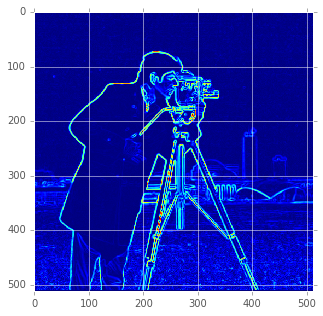

In [151]:
elevation_map = filters.sobel(camera)
fig = plt.figure(figsize=(5,5))
plt.imshow(elevation_map,cmap=plt.cm.jet,interpolation='nearest')

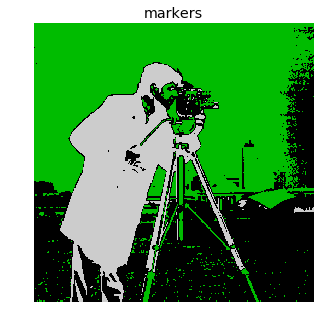

In [159]:
markers = np.zeros_like(camera)
markers[camera < 30] = 2
markers[camera > 150] = 1

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

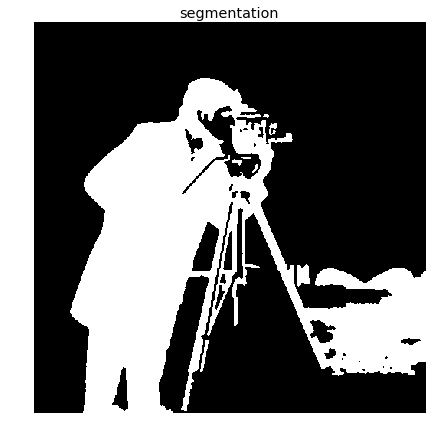

In [160]:
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

(-0.5, 511.5, 511.5, -0.5)

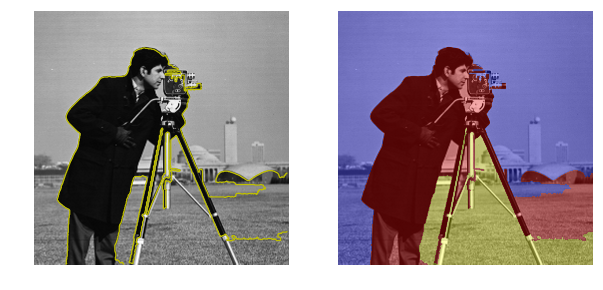

In [168]:
from skimage.color import label2rgb
from scipy import ndimage

segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndimage.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=camera)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
ax1.imshow(camera, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')

# fig.subplots_adjust(**margins)